<a href="https://colab.research.google.com/github/mertz1999/Alzheimer-s-Disease-Prediction/blob/main/Alzh_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.naive_bayes import GaussianNB


In [ ]:
# Variable to save information in each step
accu_dict = {
    "random_forest" : 0.0,
    "knn"           : 0.0,
    "bayes"         : 0.0,
            } 

precision_dict = {
    "random_forest" : 0.0,
    "knn"           : 0.0,
    "bayes"         : 0.0,
            } 

recall_dict = {
    "random_forest" : 0.0,
    "knn"           : 0.0,
    "bayes"         : 0.0,
            } 

f1_dict = {
    "random_forest" : 0.0,
    "knn"           : 0.0,
    "bayes"         : 0.0,
            } 

In [ ]:
# Loafing Data 
data = pd.read_excel('Data.xlsx')
data = data.drop('ID', axis=1)
data

,LO,Age,SEX,EDU,SE,Hert,smoke,COV,COV-R,Alzh
0,1,62,1,13,2,1,1,1,2,1
1,1,73,0,16,2,1,1,1,2,1
2,1,39,0,6,2,1,0,1,2,1
3,1,60,1,0,2,0,1,1,1,1
4,1,64,0,18,3,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...
3379,6,73,1,10,2,0,0,0,2,0
3380,6,49,1,10,3,0,0,0,2,0
3381,6,51,1,6,3,0,0,0,3,0
3382,6,64,0,12,3,0,0,0,1,0


In [ ]:
data['Age'].describe()

count    3384.000000
mean       54.775709
std        11.731764
min        35.000000
25%        45.000000
50%        55.000000
75%        65.000000
max        75.000000
Name: Age, dtype: float64

In [ ]:
# Information in train part
data.describe()

,LO,Age,SEX,EDU,SE,Hert,smoke,COV,COV-R,Alzh
count,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000
mean,3.677009,54.775709,0.498818,8.896868,1.991135,0.153960,0.499409,0.492317,1.958333,0.294917
std,1.704264,11.731764,0.500072,5.432982,0.811121,0.360964,0.500074,0.500015,0.820071,0.456073
min,1.000000,35.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,45.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.000000,55.000000,0.000000,9.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.000000,65.000000,1.000000,14.000000,3.000000,0.000000,1.000000,1.000000,3.000000,1.000000
max,6.000000,75.000000,1.000000,18.000000,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000


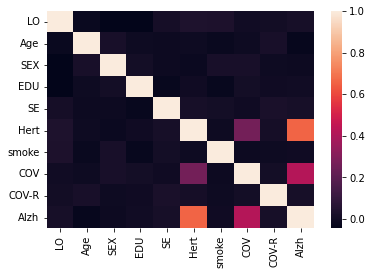

In [ ]:
data_corr = data.corr()
sns.heatmap(data_corr)

In [ ]:
# Seprate label and feature
labels = data['Alzh']
features = data.drop('Alzh', axis=1)
features = features.drop('SEX', axis=1)

features_list = list(features.columns)


In [ ]:
# Train, Test split
train_features, test_features, train_labels, test_labels = train_test_split(
    features, 
    labels, 
    test_size = 0.25, 
    random_state = 42
    )

print("Train: ", len(train_features))
print("Test : ", len(test_features))

Train:  2538
Test :  846


# Random Forest

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# --- Find MAE
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', np.mean(errors))


# --- Find accuracy
# set threshold
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0

# Which one is correct: 
diff = predictions - np.array(test_labels)
True_pred = len(diff[diff == 0])
print("Accuracy           : ", True_pred/len(diff) * 100)


Mean Absolute Error: 0.20058930822920187
Accuracy           :  83.92434988179669


 --------- Result of Random forest ---------
Random forest precision :  0.6181818181818182
Random forest recall    :  0.845771144278607
Random forest F1 Score  :  0.7142857142857144




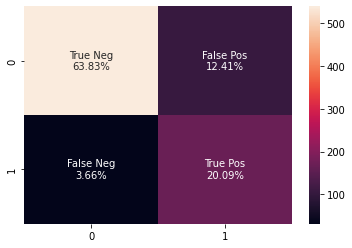

In [ ]:
# --- Calculate precision and recall with cf matix
cf_matrix = confusion_matrix(predictions, np.array(test_labels))
precision = precision_score(predictions, np.array(test_labels))
recall    = recall_score(predictions, np.array(test_labels))
f1        = f1_score(predictions, np.array(test_labels))

# Namee
group_names = ['True Neg',
               'False Pos',
               'False Neg',
               'True Pos']

# find precentages of each confusion matrix
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

# Make labels
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Plot heatmap
sns.heatmap(cf_matrix, annot=labels, fmt='')

# Print Info 
print(" --------- Result of Random forest ---------")
print("Random forest precision : ", precision)
print("Random forest recall    : ", recall)
print("Random forest F1 Score  : ", f1)
print("\n")

In [ ]:
accu_dict['random_forest']      = True_pred/len(diff)
precision_dict['random_forest'] = precision
recall_dict['random_forest']    = recall
f1_dict['random_forest'] = f1

# KNN Algorithms

In [ ]:
# Fit model
knn_model = KNeighborsRegressor(n_neighbors=12)
knn_model.fit(train_features, train_labels)

KNeighborsRegressor(n_neighbors=12)

In [ ]:
# Predict test part of dataset
predictions = knn_model.predict(test_features)

In [ ]:
# --- Find RMSE
mse = mean_squared_error(test_labels, predictions)
print("MSE                : ", mse)
# --- Find accuracy
# set threshold
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0

# Which one is correct: 
diff = predictions - np.array(test_labels)
True_pred = len(diff[diff == 0])
print("Accuracy           : ", True_pred/len(diff) * 100)


MSE                :  0.20645357236669293
Accuracy           :  70.09456264775413


 --------- Result of Random forest ---------
KNN precision :  0.16363636363636364
KNN recall    :  0.6617647058823529
KNN F1 Score  :  0.26239067055393583




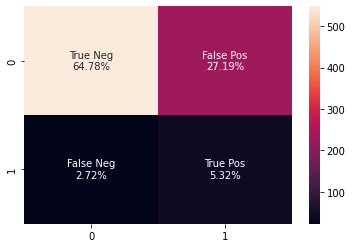

In [ ]:
# --- Calculate precision and recall with cf matix
cf_matrix = confusion_matrix(predictions, np.array(test_labels))
precision = precision_score(predictions, np.array(test_labels))
recall    = recall_score(predictions, np.array(test_labels))
f1        = f1_score(predictions, np.array(test_labels))


# Namee
group_names = ['True Neg',
               'False Pos',
               'False Neg',
               'True Pos']

# find precentages of each confusion matrix
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

# Make labels
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Plot heatmap
sns.heatmap(cf_matrix, annot=labels, fmt='')

# Print Info 
print(" --------- Result of Random forest ---------")
print("KNN precision : ", precision)
print("KNN recall    : ", recall)
print("KNN F1 Score  : ", f1)
print("\n")

In [ ]:
accu_dict['knn']      = True_pred/len(diff)
precision_dict['knn'] = precision
recall_dict['knn']    = recall
f1_dict['knn'] = f1

# Naive Bayes

In [ ]:
# Model fit
bayes_model = GaussianNB()
bayes_model.fit(train_features, train_labels)

GaussianNB()

In [ ]:
# Predict test part of dataset
predictions = bayes_model.predict(test_features)

In [ ]:
# --- Find RMSE
mse = mean_squared_error(test_labels, predictions)
print("MSE                : ", mse)
# --- Find accuracy
# set threshold
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0

# Which one is correct: 
diff = predictions - np.array(test_labels)
True_pred = len(diff[diff == 0])
print("Accuracy           : ", True_pred/len(diff) * 100)


MSE                :  0.14893617021276595
Accuracy           :  85.1063829787234


 --------- Result of Random forest ---------
Bayes precision :  0.5418181818181819
Bayes recall    :  1.0
Bayes F1 Score  :  0.7028301886792453




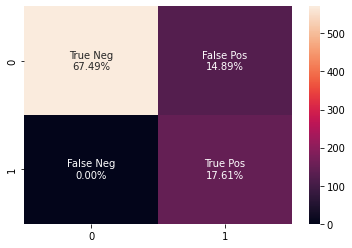

In [ ]:
# --- Calculate precision and recall with cf matix
cf_matrix = confusion_matrix(predictions, np.array(test_labels))
precision = precision_score(predictions, np.array(test_labels))
recall    = recall_score(predictions, np.array(test_labels))
f1        = f1_score(predictions, np.array(test_labels))


# Namee
group_names = ['True Neg',
               'False Pos',
               'False Neg',
               'True Pos']

# find precentages of each confusion matrix
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

# Make labels
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Plot heatmap
sns.heatmap(cf_matrix, annot=labels, fmt='')

# Print Info 
print(" --------- Result of Random forest ---------")
print("Bayes precision : ", precision)
print("Bayes recall    : ", recall)
print("Bayes F1 Score  : ", f1)
print("\n")

In [ ]:
accu_dict['bayes']      = True_pred/len(diff)
precision_dict['bayes'] = precision
recall_dict['bayes']    = recall
f1_dict['bayes'] = f1

# Results plotting

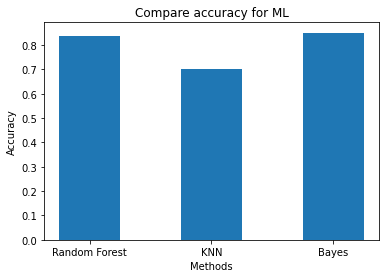

In [ ]:
# Accuracy
 
plt.bar(["Random Forest", "KNN", "Bayes"], [accu_dict['random_forest'], accu_dict['knn'], accu_dict['bayes']],
        width = 0.5)
 
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Compare accuracy for ML")
plt.show()


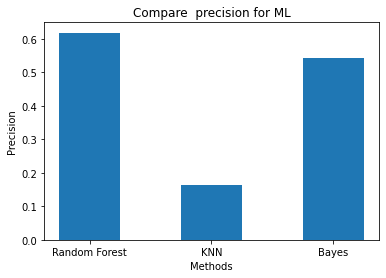

In [ ]:
# precision
 
plt.bar(["Random Forest", "KNN", "Bayes"], [precision_dict['random_forest'], precision_dict['knn'], precision_dict['bayes']],
        width = 0.5)

plt.xlabel("Methods")
plt.ylabel("Precision")
plt.title("Compare  precision for ML")
plt.show()


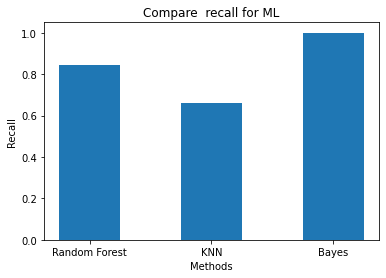

In [ ]:
# recall
 
plt.bar(["Random Forest", "KNN", "Bayes"], [recall_dict['random_forest'], recall_dict['knn'], recall_dict['bayes']],
        width = 0.5)

plt.xlabel("Methods")
plt.ylabel("Recall")
plt.title("Compare  recall for ML")
plt.show()

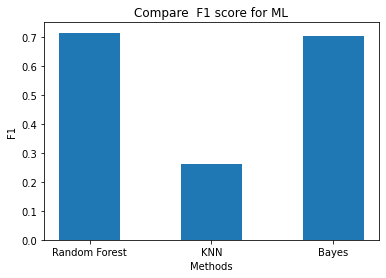

In [ ]:
# F1 Score
 
plt.bar(["Random Forest", "KNN", "Bayes"], [f1_dict['random_forest'], f1_dict['knn'], f1_dict['bayes']],
        width = 0.5)

plt.xlabel("Methods")
plt.ylabel("F1")
plt.title("Compare  F1 score for ML")
plt.show()